In [ ]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

C:\Users\felip\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('principal_components_with_labels.csv')
data.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,target
0,0.436639,1.079375,-0.278275,0.138661,0.843495,-0.500399,0.220313,0.111584,0.302243,-0.031368,...,-0.012222,0.000506,0.007595,-0.002573,0.002425,0.002809,0.005853,0.004951,-0.002804,sad
1,0.775622,0.478973,0.009516,-0.260569,0.765269,0.833767,0.236832,0.297849,0.066839,-0.236787,...,-0.006807,-0.012946,0.012036,-0.006166,-0.001948,-0.002256,-0.008071,0.002479,-0.005386,sad
2,-0.413139,1.297954,0.107259,-0.287839,0.405394,-0.054492,0.653544,0.137485,-0.273577,-0.176406,...,0.004760,0.011480,0.006659,-0.004969,-0.003428,0.009815,-0.010470,-0.000975,0.019077,sad
3,0.447562,0.082006,-0.606895,-0.022872,0.660889,-0.280462,-0.223506,-0.342493,-0.130315,0.191637,...,0.012252,-0.010309,-0.008487,-0.009310,0.003942,0.006808,0.000352,-0.001738,-0.004340,sad
4,2.833448,-0.210422,0.357042,-1.063551,0.254129,0.686534,0.202905,0.047632,-0.232764,-0.245012,...,-0.000840,-0.006327,-0.004877,-0.009317,0.006255,0.010074,0.006950,-0.000787,-0.001309,sad


In [3]:
train_data, test_data, train_labels, test_labels = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.001, random_state=42)

In [4]:
clf_rbf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", svm.SVC(kernel="rbf", C=5, probability=True, verbose=True))
])
clf_rbf.fit(train_data.values, train_labels.values)

[LibSVM]

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, probability=True, verbose=True))])

In [5]:
y_train_pred = cross_val_predict(clf_rbf, train_data, train_labels, cv=5)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

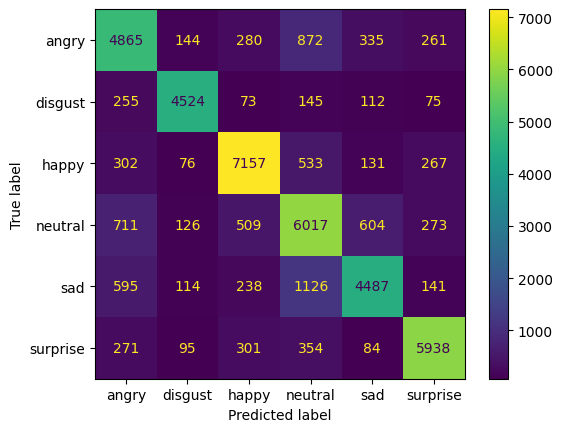

In [6]:
mat = confusion_matrix(train_labels, y_train_pred)
ConfusionMatrixDisplay(mat, display_labels=clf_rbf.classes_).plot()

In [7]:
precision = precision_score(train_labels, y_train_pred, average='weighted')
recall = recall_score(train_labels, y_train_pred, average='weighted')
f1_score = 2 * (precision * recall) / (precision + recall)

print(precision)
print(recall)
print(f1_score)

0.7811603383688366
0.778184048500861
0.7796693530419719


In [8]:
import pickle
pickle.dump(clf_rbf, open("emotion_model.pkl", "wb"))